# <font color = "red">Classificação de Risco de Crédito</font>

## Análise Exploratória dos Dados e Engenharia de Atributos

<font color = "red">Problema de Negócio:</font> A partir de dados históricos, irei verificar os padrões que levaram os clientes de uma instituição financeira, a adentrarem, ou não, na situação de inadimplência, para posteriormente criar um 

<font color = "red">Meta de Acurácia Final:</font> ACC mínimo de 88%

<font color = "Green">Nesta etapa, realizarei o tratamento de outliers e valores NA/Missing, a fim de entender melhor os dados e prepará-los para as etapas de geração de insights e machine learning 

In [1]:
# Imports 
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sys.path.append(os.path.abspath('..'))
from utils import *

# <font color = "GREEN"> DECISÕES TOMADAS </font>

##### <font color = "GREEN">Outliers</font>
- Renda, Idade e Anos no Emprego possuem outliers extremamentes fortes. farei o tratamento disso:
  - Realizei o primeiro tratamento de outliers, 2 variáveis estão sem, outras estão com outliers ainda, pois estão bem próximos ao limíte;
  - Fiz o ajuste fino de forma manual nessas variaveis, agora apennas a Variável Renda_Anual possui valores outliers (Beeeem próximo ao limite), por isso resolvi deixá-los, para não comprometer o conjunto
- Taxa_Juros possui poucos outliers, irei excluí-los, para então imputar valor médio em seus dados ausentes
- A distribuição dos dados, após o tratamento de outliers ficou muito mais limpa e bem "distribuída"

##### <font color = "GREEN">Valores Ausentes</font>
- Apaguei todos os 895 registros onde Anos_no_emprego são iguais a NA


- DF foi de (32581, 12), para (21733, 13). Haviam muitos dados NA e outliers 



In [2]:
# Importando os dados 
df = pd.read_csv("C:/Projetos Pessoais/DataScience/analise_Risco_Credito/data/dados_mapeados2.csv")

In [3]:
df.sample(5)

,Idade,Renda_Anual,Tipo_Moradia,Anos_no_Emprego,Motivo_Emprestimo,Grau_Emprestimo,Valor,Taxa_Juros,Status_Pagamento,Comprometimento_Renda,Inadimplencia_Historica,Duracao_Historico_Credito
15241,25.0,126000.0,Hipoteca,9.0,Educação,A,15000.0,7.90,0,0.12,Não,3.0
25774,34.0,90000.0,Hipoteca,19.0,Consolidação Dívidas,C,5000.0,13.61,0,0.06,Não,7.0
3606,25.0,31800.0,Outro,1.0,Reformas Domésticas,C,10000.0,12.53,1,0.31,Não,3.0
21186,27.0,45500.0,Hipoteca,2.0,Consolidação Dívidas,C,5000.0,13.23,0,0.11,Sim,8.0
24873,28.0,71652.0,Hipoteca,11.0,Pessoal,G,25000.0,20.03,1,0.35,Não,9.0


In [4]:
# transformando a classe alvo em object
df['Status_Pagamento'] = df['Status_Pagamento'].astype("object")

In [5]:
df.shape

(32581, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Idade                      32581 non-null  float64
 1   Renda_Anual                32581 non-null  float64
 2   Tipo_Moradia               32581 non-null  object 
 3   Anos_no_Emprego            31686 non-null  float64
 4   Motivo_Emprestimo          32581 non-null  object 
 5   Grau_Emprestimo            32581 non-null  object 
 6   Valor                      32581 non-null  float64
 7   Taxa_Juros                 29465 non-null  float64
 8   Status_Pagamento           32581 non-null  object 
 9   Comprometimento_Renda      32581 non-null  float64
 10  Inadimplencia_Historica    32581 non-null  object 
 11  Duracao_Historico_Credito  32581 non-null  float64
dtypes: float64(7), object(5)
memory usage: 3.0+ MB


In [7]:
df.describe()

,Idade,Renda_Anual,Anos_no_Emprego,Valor,Taxa_Juros,Comprometimento_Renda,Duracao_Historico_Credito
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


In [8]:
# Verificando valores ausentes

df.isna().sum()

Idade                           0
Renda_Anual                     0
Tipo_Moradia                    0
Anos_no_Emprego               895
Motivo_Emprestimo               0
Grau_Emprestimo                 0
Valor                           0
Taxa_Juros                   3116
Status_Pagamento                0
Comprometimento_Renda           0
Inadimplencia_Historica         0
Duracao_Historico_Credito       0
dtype: int64

In [9]:
# Removendo valores NaN - Apenas Anos_no_Emprego 
df.dropna(subset=['Anos_no_Emprego'], inplace=True)


In [10]:
df.isna().sum()

Idade                           0
Renda_Anual                     0
Tipo_Moradia                    0
Anos_no_Emprego                 0
Motivo_Emprestimo               0
Grau_Emprestimo                 0
Valor                           0
Taxa_Juros                   3048
Status_Pagamento                0
Comprometimento_Renda           0
Inadimplencia_Historica         0
Duracao_Historico_Credito       0
dtype: int64

### <font color = "red">Iniciando Tratamento de Outliers

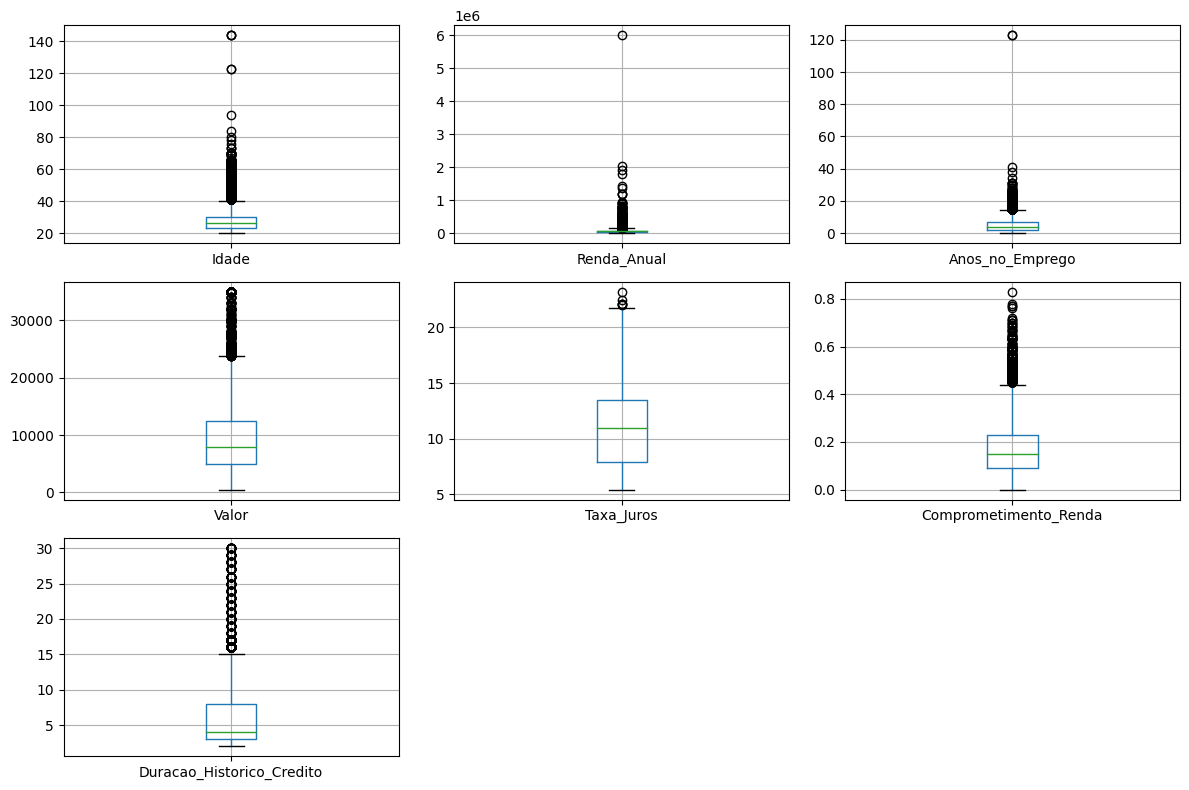

In [11]:
# Outliers das variáveis numéricas 
# Plot das variáveis contínuas 
variaveis_numericas = ['Idade','Renda_Anual','Anos_no_Emprego',
                       'Valor','Taxa_Juros','Comprometimento_Renda',
                       'Duracao_Historico_Credito']

# tamanho da área de plotagem 
fig = plt.figure(figsize= (12,8))

# Loop pelas variáveis contínuas 
for i, col in enumerate(variaveis_numericas):
 plt.subplot(3, 3, i + 1);
 df.boxplot(col)
 plt.tight_layout()

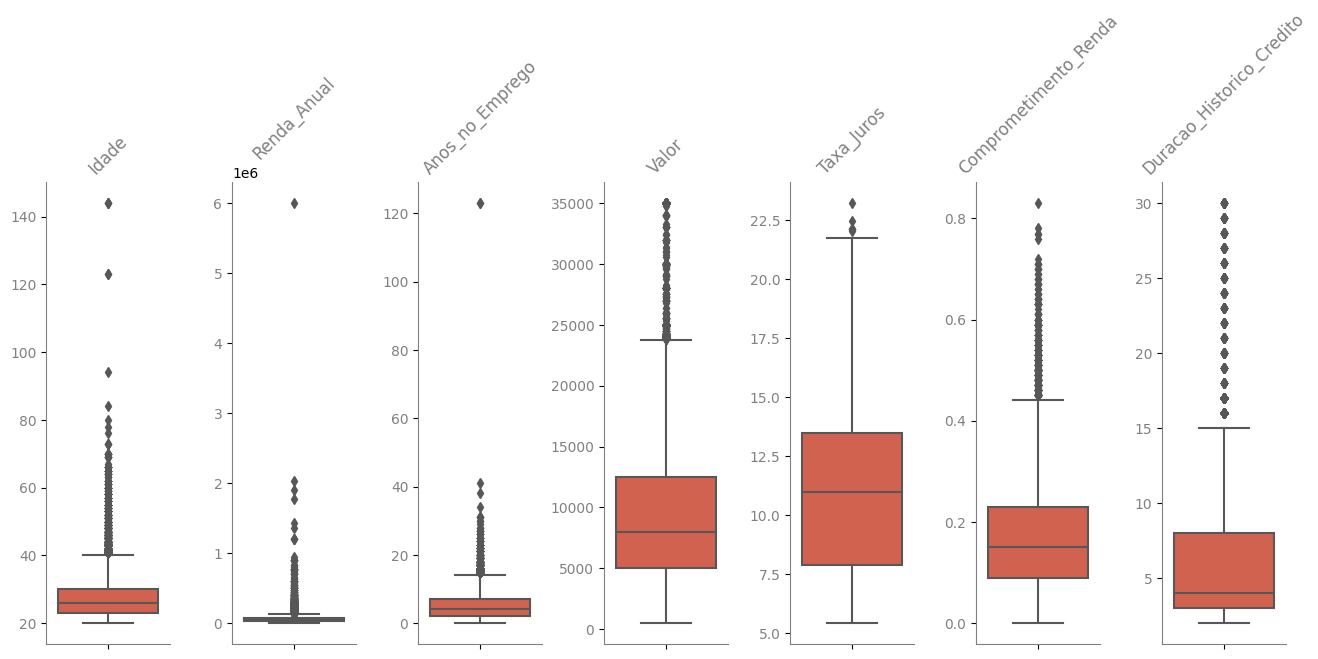

In [20]:
variaveis_numericas = ['Idade', 'Renda_Anual', 'Anos_no_Emprego',
                       'Valor', 'Taxa_Juros', 'Comprometimento_Renda',
                       'Duracao_Historico_Credito']

# Tamanho da figura
plt.figure(figsize=(16, 6))  # Ajuste o tamanho conforme necessário

# Ajuste o espaçamento entre os subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Loop para criar os gráficos de boxplot para cada variável
for i, col in enumerate(variaveis_numericas):
    plt.subplot(1, len(variaveis_numericas), i + 1)  # Subplot único em uma linha
    sns.boxplot(y=df[col], color="#e7533a", orient='v')  # Estilizando com Seaborn
    plt.title(col, rotation=45, color="grey")  # Define o título inclinado a 45 graus
    plt.ylabel("")  # Remove o label do eixo y para economizar espaço vertical
    plt.yticks(color="grey")  # Ajuste a cor dos ticks no eixo y

    # Remover bordas direita e superior e ajustar cor das bordas restantes
    sns.despine(right=True, top=True)  # Remove as bordas direita e superior
    plt.gca().spines['left'].set_color('grey')  # Define a cor da borda esquerda
    plt.gca().spines['bottom'].set_color('grey')  # Define a cor da borda inferior

# Exibe o gráfico
plt.show()

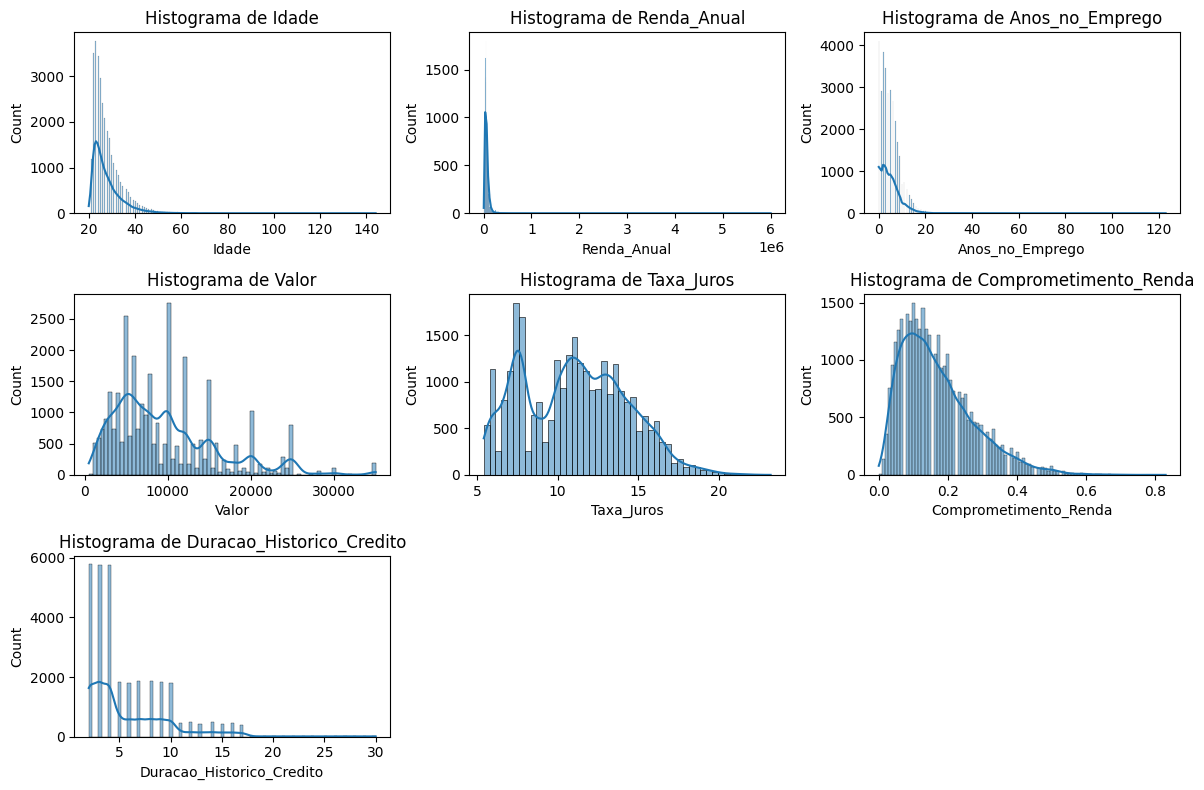

In [23]:
# Loop pelas variáveis contínuas 
fig = plt.figure(figsize= (12, 8))

# Loop pelas variáveis numéricas e plotar histograma
for i, col in enumerate(variaveis_numericas):
    plt.subplot(3, 3, i + 1)  # Criar subplots (3 linhas x 3 colunas)
    plt.title(f'Histograma de {col}')  # Título para cada gráfico
    sns.histplot(df[col], kde=True)  # Histograma com curva KDE
    plt.tight_layout()  # Ajustar o layout para não sobrepor os gráficos

plt.show()

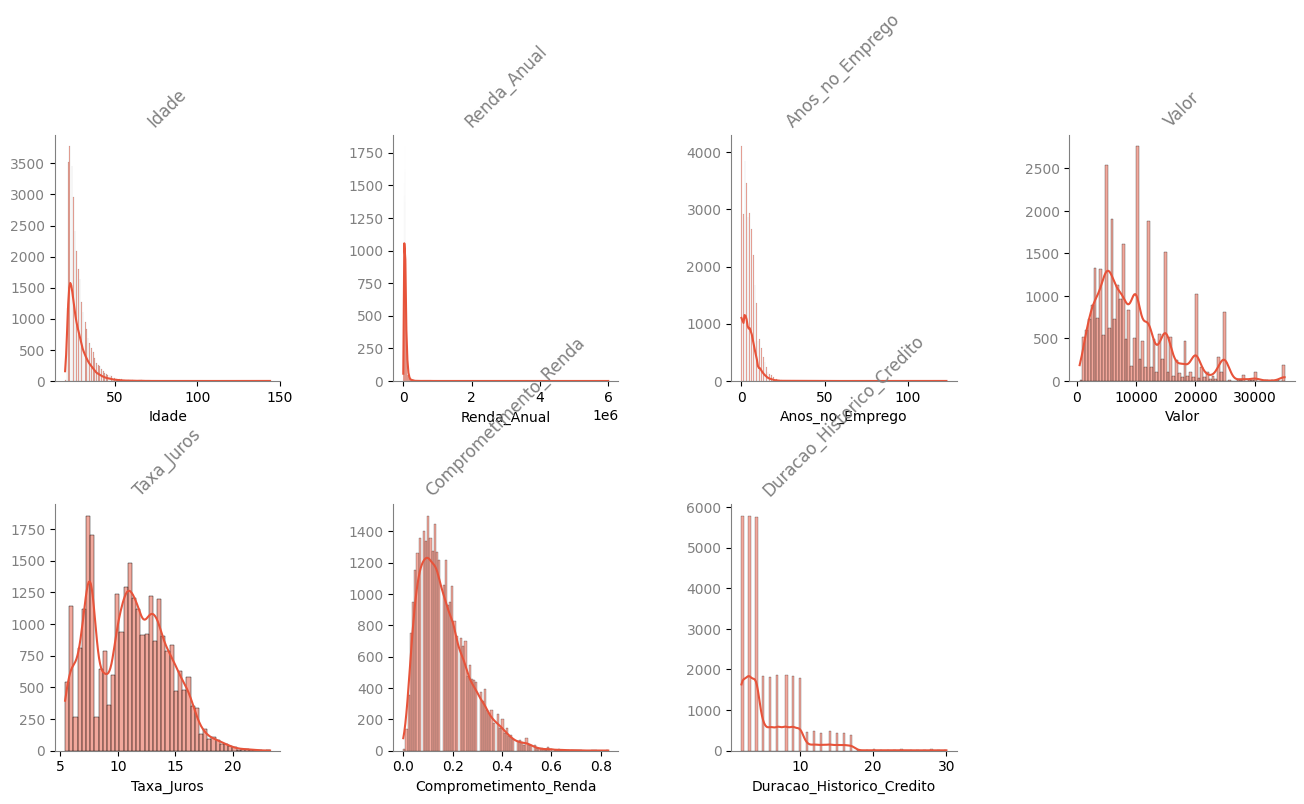

In [24]:
plt.figure(figsize=(16, 8))  # Ajuste para 2 linhas

# Ajuste o espaçamento entre os subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Loop para criar histogramas para cada variável
for i, col in enumerate(variaveis_numericas):
    plt.subplot(2, 4, i + 1)  # Subplot ajustado para 2 linhas e 4 colunas
    sns.histplot(df[col], kde=True, color="#e7533a")
    plt.title(col, rotation=45, color="grey")
    plt.ylabel("")
    plt.yticks(color="grey")
    sns.despine(right=True, top=True)
    plt.gca().spines['left'].set_color('grey')
    plt.gca().spines['bottom'].set_color('grey')

# Exibe o gráfico
plt.show()

In [25]:
# Detectando outliers utilizano IQR

def detecta_outliers(data, coluna):
 Q1 = np.quantile(data[coluna],0.25)
 Q3 = np.quantile(data[coluna],0.75)
 
 IQR = Q3 - Q1

 # lower_bound = Q1-1.5*IQR - Usaria isso apenas se tivesse outliers abaixo dos 25% 
 upper_bound = Q3+1.5*IQR

 outliers = data[(data[coluna] > upper_bound)]

 return outliers

In [26]:
df_teste2 = df.copy()
df_teste2.shape

# Colocando nova coluna "ID" para posterior comparação e eliminnação de linhas
df_teste2['ID'] = range(1, len(df_teste2) + 1)

In [27]:
df_teste2

,Idade,Renda_Anual,Tipo_Moradia,Anos_no_Emprego,Motivo_Emprestimo,Grau_Emprestimo,Valor,Taxa_Juros,Status_Pagamento,Comprometimento_Renda,Inadimplencia_Historica,Duracao_Historico_Credito,ID
0,22.0,59000.0,Aluguel,123.0,Pessoal,D,35000.0,16.02,1,0.59,Sim,3.0,1
1,21.0,9600.0,Próprio,5.0,Educação,B,1000.0,11.14,0,0.10,Não,2.0,2
2,25.0,9600.0,Hipoteca,1.0,Médico,C,5500.0,12.87,1,0.57,Não,3.0,3
3,23.0,65500.0,Aluguel,4.0,Médico,C,35000.0,15.23,1,0.53,Não,2.0,4
4,24.0,54400.0,Aluguel,8.0,Médico,C,35000.0,14.27,1,0.55,Sim,4.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57.0,53000.0,Hipoteca,1.0,Pessoal,C,5800.0,13.16,0,0.11,Não,30.0,31682
32577,54.0,120000.0,Hipoteca,4.0,Pessoal,A,17625.0,7.49,0,0.15,Não,19.0,31683
32578,65.0,76000.0,Aluguel,3.0,Reformas Domésticas,B,35000.0,10.99,1,0.46,Não,28.0,31684
32579,56.0,150000.0,Hipoteca,5.0,Pessoal,B,15000.0,11.48,0,0.10,Não,26.0,31685


In [28]:
# Função para detecção e eliminação dos Outliers
df_sem_outlier_final = df_teste2


for variavel in variaveis_numericas:
 
 outlier = detecta_outliers(df_sem_outlier_final,variavel)
 print(f"{df_sem_outlier_final.shape} - antes da variavel {variavel}, que possui {outlier.shape}")

 df_sem_outlier_final = df_sem_outlier_final[~df_sem_outlier_final['ID'].isin(outlier['ID'])]



(31686, 13) - antes da variavel Idade, que possui (1460, 13)
(30226, 13) - antes da variavel Renda_Anual, que possui (1337, 13)
(28889, 13) - antes da variavel Anos_no_Emprego, que possui (620, 13)
(28269, 13) - antes da variavel Valor, que possui (1229, 13)
(27040, 13) - antes da variavel Taxa_Juros, que possui (0, 13)
(27040, 13) - antes da variavel Comprometimento_Renda, que possui (682, 13)
(26358, 13) - antes da variavel Duracao_Historico_Credito, que possui (840, 13)


In [29]:
df_sem_outlier_final = df_sem_outlier_final[df_sem_outlier_final['Idade'] <= 35]


In [30]:
def detecta_outliers_ajuste_fino(data, coluna):
 Q1 = np.quantile(data[coluna],0.25)
 Q3 = np.quantile(data[coluna],0.75)
 
 IQR = Q3 - Q1

 # lower_bound = Q1-1.5*IQR - Usaria isso apenas se tivesse outliers abaixo dos 25% 
 upper_bound = Q3+1.5*IQR

 return upper_bound

In [31]:
for variavel in variaveis_numericas:
 print(f"Límite superior da variável {variavel} é {detecta_outliers_ajuste_fino(df_sem_outlier_final,variavel)}")

Límite superior da variável Idade é 35.5
Límite superior da variável Renda_Anual é 127400.0
Límite superior da variável Anos_no_Emprego é 14.5
Límite superior da variável Valor é 21825.0
Límite superior da variável Taxa_Juros é nan
Límite superior da variável Comprometimento_Renda é 0.39
Límite superior da variável Duracao_Historico_Credito é 10.5


In [32]:
# Ajustando fino todos os limites superiores

In [33]:
df_sem_outlier_final = df_sem_outlier_final[df_sem_outlier_final['Renda_Anual'] <= 127400.0]
df_sem_outlier_final = df_sem_outlier_final[df_sem_outlier_final['Anos_no_Emprego'] <= 14.5]
df_sem_outlier_final = df_sem_outlier_final[df_sem_outlier_final['Valor'] <= 20300.0]
df_sem_outlier_final = df_sem_outlier_final[df_sem_outlier_final['Taxa_Juros'] <= 21.2]
df_sem_outlier_final = df_sem_outlier_final[df_sem_outlier_final['Comprometimento_Renda'] <= 0.39]
df_sem_outlier_final = df_sem_outlier_final[df_sem_outlier_final['Duracao_Historico_Credito'] <= 10.5]

In [34]:
df_sem_outlier_final.shape

(21733, 13)

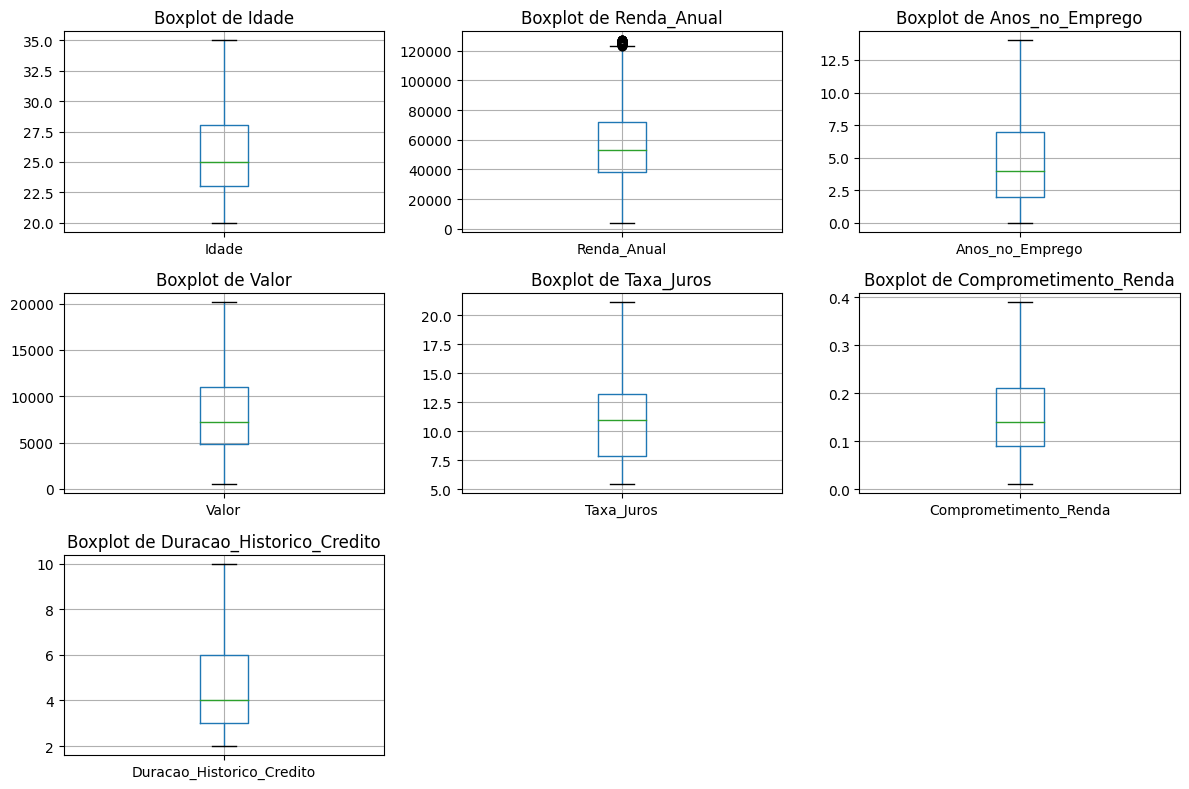

In [36]:
fig = plt.figure(figsize= (12,8))

for i, col in enumerate(variaveis_numericas):
    plt.subplot(3, 3, i + 1)
    df_sem_outlier_final.boxplot(column=col)  # Gerando boxplot para cada coluna
    plt.title(f'Boxplot de {col}')

plt.tight_layout()  # Ajusta o layout para evitar sobreposição de gráficos
plt.show()



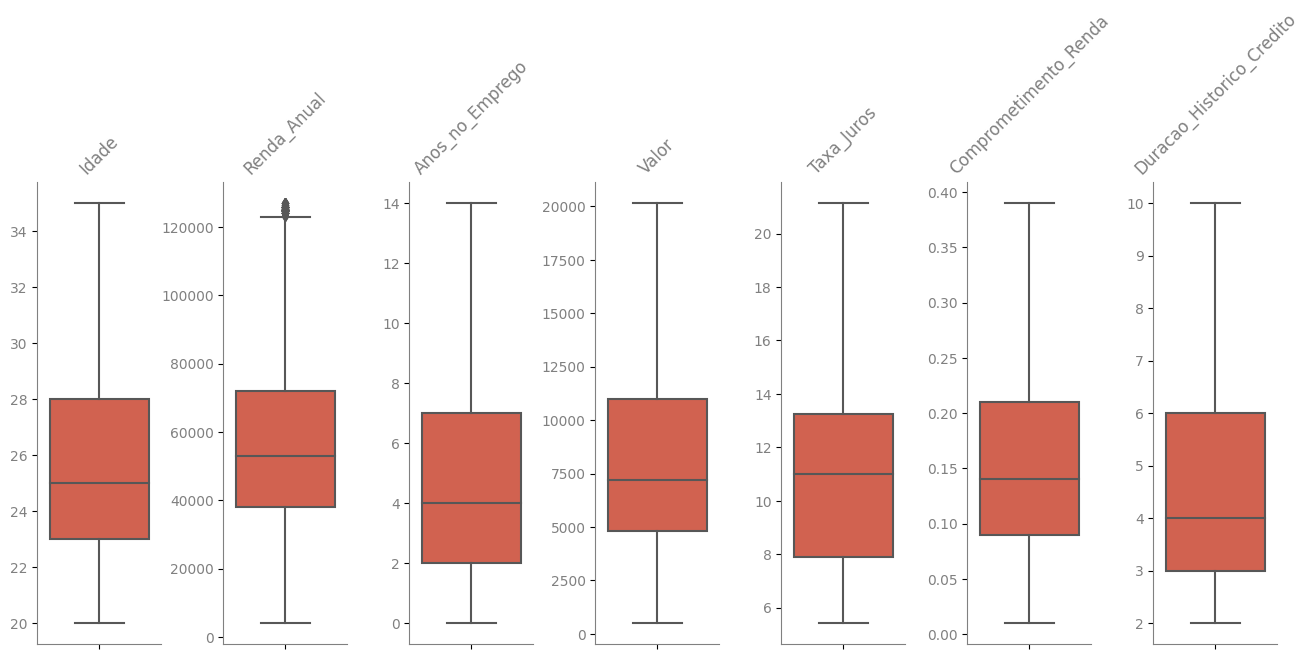

In [39]:
# Tamanho da figura
plt.figure(figsize=(16, 6))  # Ajuste o tamanho horizontal para acomodar todos os gráficos em uma linha

# Ajuste o espaçamento entre os subplots
plt.subplots_adjust(wspace=0.5)  # Apenas ajuste horizontal, já que todos estarão na mesma linha

# Loop para criar os boxplots para cada variável
for i, col in enumerate(variaveis_numericas):
    plt.subplot(1, len(variaveis_numericas), i + 1)  # Subplot ajustado para uma única linha
    sns.boxplot(y=df_sem_outlier_final[col], color="#e7533a", orient='v')  # Boxplot estilizado
    plt.title(col, rotation=45, color="grey")  # Título inclinado a 45 graus
    plt.ylabel("")  # Remove o label do eixo y
    plt.yticks(color="grey")  # Cor dos ticks no eixo y
    
    # Remover bordas direita e superior e ajustar cor das bordas restantes
    sns.despine(right=True, top=True)  # Remove as bordas direita e superior
    plt.gca().spines['left'].set_color('grey')  # Define a cor da borda esquerda
    plt.gca().spines['bottom'].set_color('grey')  # Define a cor da borda inferior

# Exibe o gráfico
plt.show()

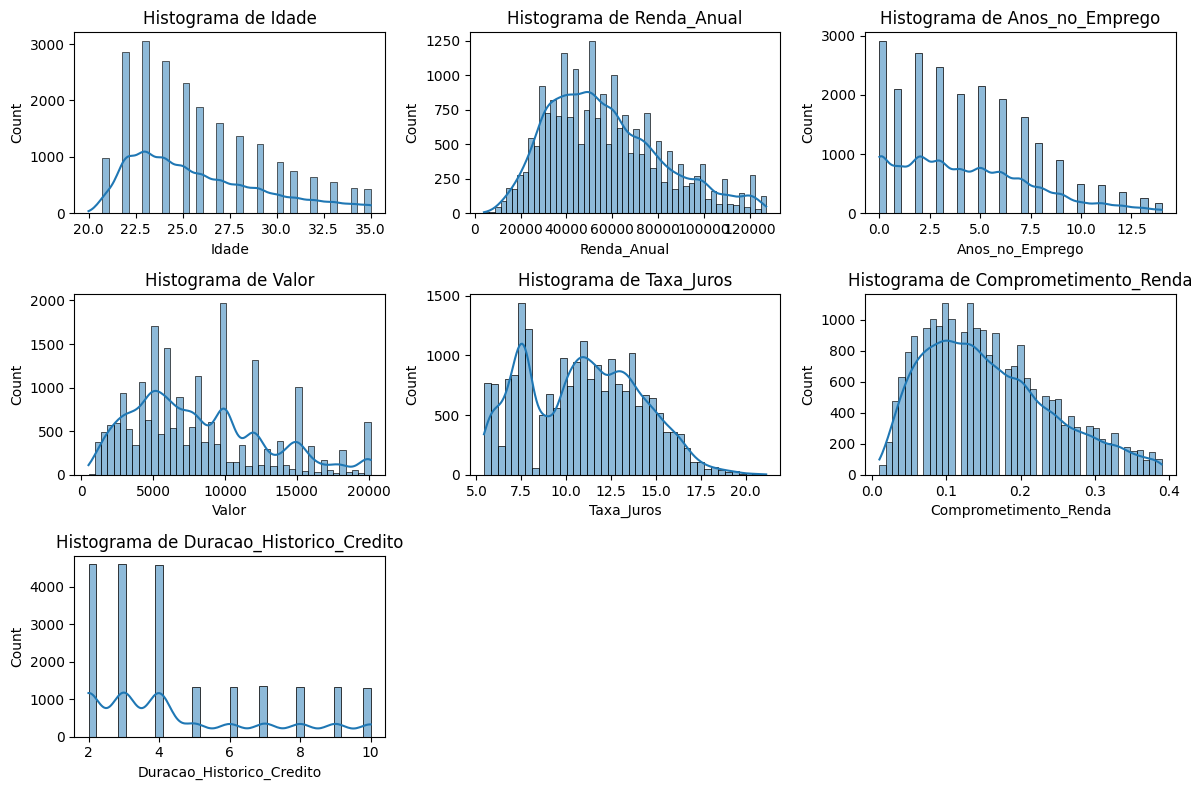

In [27]:
# Loop pelas variáveis contínuas 
fig = plt.figure(figsize= (12, 8))

# Loop pelas variáveis numéricas e plotar histograma
for i, col in enumerate(variaveis_numericas):
    plt.subplot(3, 3, i + 1)  # Criar subplots (3 linhas x 3 colunas)
    plt.title(f'Histograma de {col}')  # Título para cada gráfico
    sns.histplot(df_sem_outlier_final[col], kde=True)  # Histograma com curva KDE
    plt.tight_layout()  # Ajustar o layout para não sobrepor os gráficos

plt.show()

In [28]:
# Excluindo Variável ID, utilizada para o filtro de outliers
df_para_analise = df_sem_outlier_final.copy()

df_para_analise.drop(['ID'], axis = 1, inplace= True)


### <font color = "red">Verificando valores NA ou missing

In [29]:
# Verificando existência de valores NA nas variaveis Tx juros e ano emprego
df_para_analise.isna().sum()

Idade                        0
Renda_Anual                  0
Tipo_Moradia                 0
Anos_no_Emprego              0
Motivo_Emprestimo            0
Grau_Emprestimo              0
Valor                        0
Taxa_Juros                   0
Status_Pagamento             0
Comprometimento_Renda        0
Inadimplencia_Historica      0
Duracao_Historico_Credito    0
dtype: int64

In [30]:
df_para_analise.isnull().sum()

Idade                        0
Renda_Anual                  0
Tipo_Moradia                 0
Anos_no_Emprego              0
Motivo_Emprestimo            0
Grau_Emprestimo              0
Valor                        0
Taxa_Juros                   0
Status_Pagamento             0
Comprometimento_Renda        0
Inadimplencia_Historica      0
Duracao_Historico_Credito    0
dtype: int64

In [31]:
# Salvando DF 
df_para_analise.to_csv('../data/df_tratado_sem_outliers_3.csv', sep =',', index = False, encoding = 'utf-8')